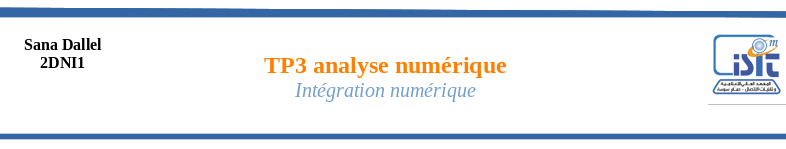

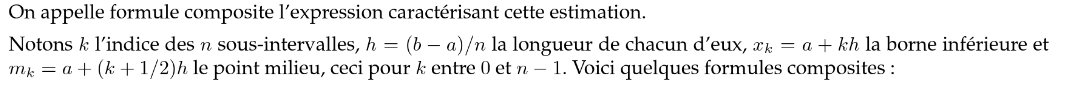

<html>
    <body>
        <h1 style="color:red;">Méthode des réctangles :</h1>
    </body>
</html>

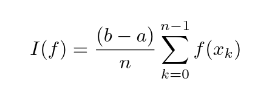

In [95]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, widgets


In [96]:
f=lambda x:1/(1+x**2)

In [104]:
class RectangleG ( object ) :
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
    def integrate ( self , f ) :
        x= self.x
        y= f( x )
        h = float( x[1] - x[0] )
        s = sum( y[ 0 : -1 ] )
        return h * s
    def Graph ( self , f , resolution =1001 ) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[ i ] , xl[ i ] , xl[ i + 1 ] , xl[i+1] , xl[ i ] ] # abscisses des sommets
            y_rect = [0 , yl[ i ] , yl[ i ] , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine )
        plt.plot(xl, yl,"bo")
        plt.xlabel ( 'x' )
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Méthode de rectangles gauches' )
        
    

In [105]:
R=RectangleG(-1,1,5,f)

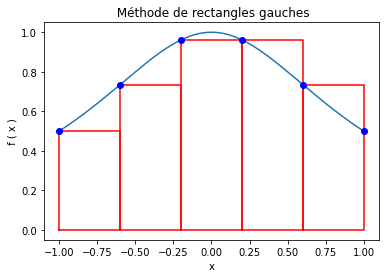

In [106]:
R.Graph(f)

In [100]:
def simulRec (n,f):
    R=RectangleG(-1,1,n,f)
    return R.Graph(f)

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=5), Dropdown(description='f', o…

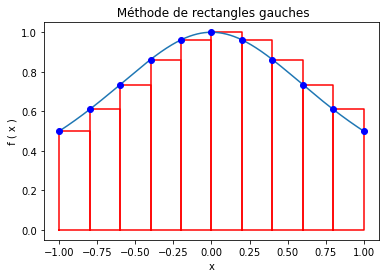

In [110]:
interact(simulRec,n=widgets.IntSlider(min=1, max=50, step=5, value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':lambda x: sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5':lambda x:x**2-x+5});

In [103]:
np.pi/2

1.5707963267948966

<html>
    <body>
        <h1 style="color:red;">Méthode des trapèzes :</h1>
    </body>
</html>




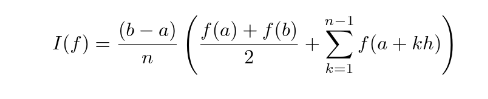

In [107]:
class Trapezoidal(object):
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def Graph (self,f,resolution =1001):
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i] , xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0 , yl[i], yl[i+1], 0, 0] # ordonnees des sommets
            plt.plot(x_rect , y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot (xlist_fine, yflist_fine)
        plt.plot(xl, yl,"cs")
        plt.xlabel ('x')
        plt.ylabel ('f(x)')
        plt.title ( 'Méthode de Trapèzes' )
        

    

In [108]:
T=Trapezoidal(-1,1,5,f)

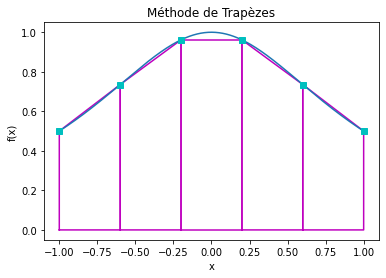

In [109]:
T.Graph(f)

<html>
    <body>
        <h1 style="color:red;">Méthode de Simpson :</h1>
    </body>
</html>


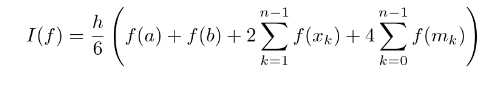

In [111]:
class Simpson (object):
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        n=len(x)-1
        if n % 2 == 1:
            n -= 1
        s = y[0] + y[n] + 4.0* sum(y[1:-1:2]) + 2.0 * sum(y[2:-2:2])
        return h * s / 3.0
    def Graph(self,f,resolution =1001):
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace(self.a , self.b , resolution)
        for i in range (self.n):
            xx=np.linspace(xl[i], xl[i+1], resolution)
            m=(xl[i]+xl[i+1])/2
            aa=xl[i]
            bb=xl[i+1]
            l0=(xx-m)/(aa-m)*(xx-bb)/(aa-bb)
            l1=(xx-aa)/(m-aa)*(xx-bb)/(m-bb)
            l2=(xx-aa)/(bb-aa)*(xx-m)/(bb-m)
            p=f(aa)*l0 + f(m)*l1 + f(bb)*l2
            plt.plot(xx,p,'b')
            plt.plot(m,f(m),"r*")
        yflist_fine = f( xlist_fine )
        plt.plot (xlist_fine , yflist_fine ,'g')
        plt.plot(xl, yl,"bo")
        plt.ylabel ('f(x)')
        plt.title ( 'Méthode de Simpson' )
       

    

In [112]:
s=Simpson(-1,1,5,f)

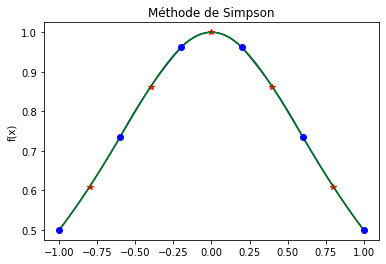

In [113]:
s.Graph(f)

<html>
    <body>
        <h1 style="color:red;">Méthode du point milieu :</h1>
    </body>
</html>


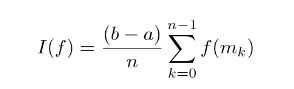

In [114]:
class Milieu(object):
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
    def integrate(self,f):
        x= self.x
        h = float(x[1] - x[0] )
        s = 0
        for i in range(self.n):
            s=s+f((x[i]+x[i+1])*0.5)
        return h*s 
    def Graph (self,f,resolution =1001):
        xl = self.x
        yl = f(xl);
        xlist_fine =np.linspace( self.a, self.b, resolution)
        for i in range(self.n):
            m=(xl[i]+xl[i+1])/2
            x_rect = [xl[i] , xl[i] , xl[i+1] , xl[i+1] , xl[i]] # abscisses des sommets
            y_rect = [0 , f(m) , f(m) , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , "r" )
            plt.plot(m,f(m),"b*")
        yflist_fine = f(xlist_fine)
        plt.plot (xlist_fine , yflist_fine ,'g')
        plt.plot(xl, yl,"bo")
        plt.xlabel ('x')
        plt.ylabel ('f(x)')
        plt.title ( 'Methode de point Milieu' )
        #plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )


In [115]:
M=Milieu(-1,1,10,f)

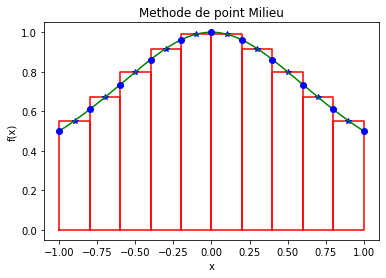

In [116]:
M.Graph(f)

<html>
    <body>
        <h1 style="color:red;">Simulation :</h1>
    </body>
</html>

In [117]:
def simul(n,f):
    R=RectangleG(-1,1,n,f)
    T=Trapezoidal(-1,1,n,f)
    s=Simpson(-1,1,n,f)
    M=Milieu(-1,1,n,f)
    fig= plt.figure(figsize=(15,9))
    plt.subplot(221)
    R.Graph(f)
    plt.subplot(222) 
    T.Graph(f)
    plt.subplot(223)
    s.Graph(f)
    plt.subplot(224)
    M.Graph(f)
    plt.show()

In [118]:
interact(simul,n=widgets.IntSlider(min=1, max=50, step=3, value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':lambda x: sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5':lambda x:x**2-x+5});

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=3), Dropdown(description='f', o…

<html>
    <body>
        <h1 style="color:red;">Interface graphique :</h1>
    </body>
</html>


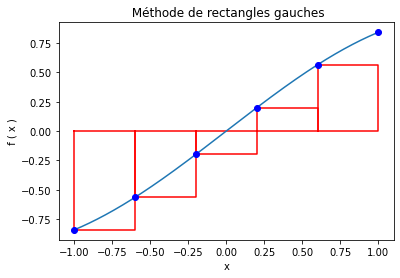

In [120]:
sel=widgets.Dropdown(
    options=[('Méthode de rectangle gauches',1), ('Méthode des trapèzes',2), ('Méthode des Simpson',3), ('Méthode des points milieux',4)],
    value=1,
    description='Méthode:',
    
)
text_func=widgets.Text(value='sin(x)', description='Fonction', continuous_update=False)
text_a = widgets.IntText(value=-1,description='Valeur de a', continuous_update=False)
text_b = widgets.IntText(value=1,description='Valeur de b', continuous_update=False)
text_n=widgets.Text(value='5', description='n', continuous_update=False)
text_int=widgets.Text(value='', description='Résultat', continuous_update=True)
button=widgets.Button(description="Afficher")
def sim(b):
    dic={1:RectangleG,2:Trapezoidal,3:Simpson,4:Milieu}
    s=sel.value
    plt.cla()
    func=lambda x:eval(text_func.value)
    R=dic[s](float(text_a.value), float(text_b.value),int(text_n.value),func)
    R.Graph(func)
    text_int.value=str(R.integrate(func))
    text_int.description='I_'+text_n.value
    
def update_a(change):
    change.new 
def update_b(change):
    change.new 
def update_n(change):
    change.new
def update_f(change):
    change.new 
button.on_click(sim)
text_func.observe(update_f,'value')
text_a.observe(update_a,'value')
text_b.observe(update_b,'value')
output= widgets.Output()


def make_boxes():
    vbox1 = widgets.VBox([sel, text_func,text_a,text_b,text_n,button,text_int])
    vbox2 = widgets.VBox([ output])
    return vbox1, vbox2
vbox1, vbox2 = make_boxes()
vbox1.Layout = box_layout
vbox2.Layout = box_layout
widgets.HBox([vbox1, vbox2])

    

